# Simple Lense

In this first tutorial, we are going to learn how HyVR works and how to create simple objects that represent sedimentary structures and add tehm to a simulation grid.

## 1. Creating a simulation grid

HyVR works with a 3D grid that represents the domain where the simulation will be performed.
A simple way of doing that is to create a 3D numpy array where each cell contains the properties of the media and the sedimentary structures that are present in that cell.
But any grid that can be reduced to a numpy array of cell coordinates can be used.

Since we use MODFLOW a lot. The numpy grid is done with the axis according to the MODFLOW convention.
That is, the first axis is the layer, the second is the row and the third is the column. Moreover, the first layer is the top layer and the last layer is the bottom layer, and the first row is the top row and the last row is the bottom row (like a matrix).

In [1]:
import numpy as np

# creating a grid according to the MODFLOW convention
xs = np.arange(0, 100.1, 0.5)
ys = np.arange(0, 80.1, 0.5)
zs = np.arange(0, 20.1, 0.4)
z, y, x = np.meshgrid(zs, ys, xs, indexing="ij")
z = np.flip(z, axis=0)
y = np.flip(y, axis=1)

## 2. Initialize the sedimentary attribute arrays

The objects that we simulate define a certain structure. This structure in a cell can be represented by the attributes:
- facies: the sedimentary facies assigned to each cell
- dip: the dip of the sedimentary structure
- dip_direction: the dip direction of the sedimentary structure

Since we modify these attributes in place when we create an object, we have to initialize these objects before. We can do that by creating a numpy array with the same shape as the simulation grid. The facies is an integer array with the facies code. (-1) facies code is used to represent a non assigned cell. The dip and dip_direction are float arrays with the dip and dip direction of the sedimentary structure in degrees.

In [2]:
facies = np.ones_like(x, dtype=np.int32) * (-1)
dip_array = np.zeros_like(x)
dip_dir_array = np.zeros_like(x)

## 3. Create a simple lense that modifies the attribute arrays

A discontinuous sedimentary lens can be represented by a half-ellipsoid object. This object is the lower part of an ellipsoid cut in half in the horizontal direction. Itis defined by the center of the ellipsoid, the major and minor axis, in the horizontal direction and the height in the vertical direction, and the azimuth of the major axis.

In [3]:
from hyvr import half_ellipsoid

centercoord = np.array([50, 40, 19])
dims = np.array([40, 20, 10])
half_ellipsoid(
    facies,
    dip_array,
    dip_dir_array,
    x,
    y,
    z,
    centercoord,
    dims,
    azim=20.0,
    facies=np.array([1]),
)

## Plotting

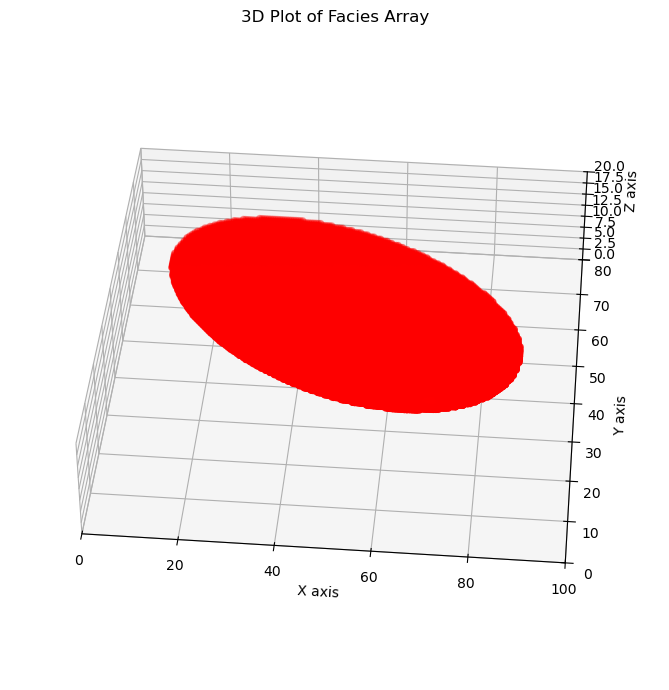

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plotting the facies array
ax.scatter(x[facies == 1], y[facies == 1], z[facies == 1], c="r", marker="o")
ax.view_init(elev=40, azim=275)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_title("3D Plot of Facies Array")
ax.set_xlim(0, 100)
ax.set_ylim(0, 80)
ax.set_zlim(0, 20)
ax.set_box_aspect([4, 4, 1])  # Aspect ratio is 2:2:1 to reduce vertical exaggeration
fig.tight_layout()

## 4. More complex lense with internal structure

That was very simple and can represent a discontinuous clay lense for example. But other sedimentary process may be more heterogeneous. One way to represent that is to create a lense with internal structure. This can be done by creating a lense with a different facies inside it. with different angles of dip and dip direction. Lets see the examples of the two types of internal structures implemented in HyVR.

### 4.1. Lense with internal layering

We know specify the internal structure in the half-ellipsoid function with the following arguments:

- `facies`: a numpy array with the internal facies that will be assigned with the object
- `internal_layering`: boolean that specifies if the internal structure is layering or not
- `alternating_facies`: boolean that specifies if the internal structure is alternating sequence of `facies` or, if `False`, it is a random sequence of `facies`.
- `bulb`: boolean that specifies if, `True`, the internal structure is a bulb or a layering (Defaults is `false`).
- `layer_dist`: a float that specifies the distance between the layers in the internal structure.
- `dip_dir`: a float that specifies the dip direction of the internal structure.
- `dip`: a float that specifies the dip of the internal structure.

In [5]:
facies = np.ones_like(x, dtype=np.int32) * (-1)
dip_array = np.zeros_like(x)
dip_dir_array = np.zeros_like(x)
half_ellipsoid(
    facies,
    dip_array,
    dip_dir_array,
    x,
    y,
    z,
    centercoord,
    dims,
    azim=20.0,
    facies=np.array([1, 2, 3]),
    internal_layering=True,
    alternating_facies=True,
    bulb=False,
    layer_dist=3,
    dip_dir=20.0,
    dip=25.0,
)

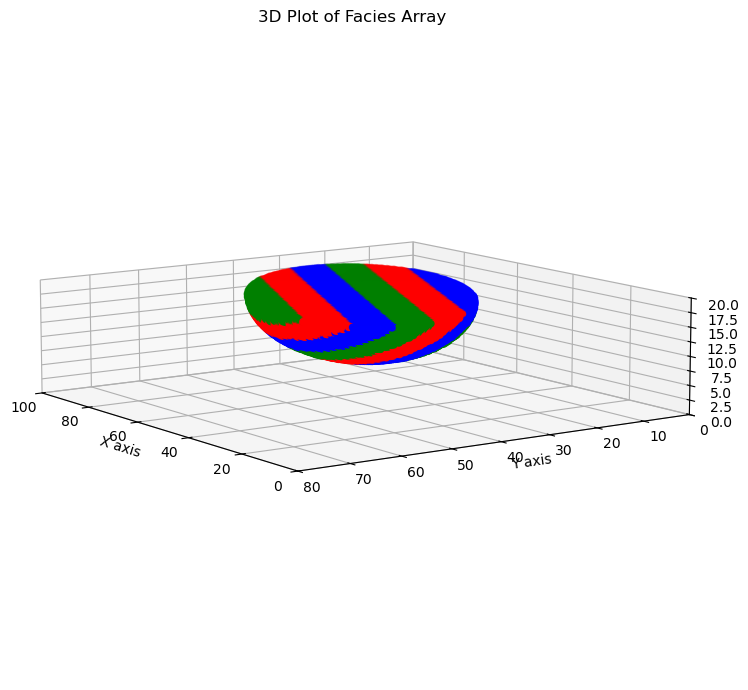

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plotting the facies array
# facies = facies.flatten()
colors = np.where(
    facies == 1, "r", np.where(facies == 2, "g", np.where(facies == 3, "b", "k"))
)
ax.scatter(
    x[facies != -1],
    y[facies != -1],
    z[facies != -1],
    c=colors[facies != -1],
    marker="o",
)
ax.view_init(elev=10, azim=145)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_title("3D Plot of Facies Array")
ax.set_xlim(0, 100)
ax.set_ylim(0, 80)
ax.set_zlim(0, 20)
ax.set_box_aspect([4, 4, 1])  # Aspect ratio is 2:2:1 to reduce vertical exaggeration
fig.tight_layout()

## Bulb structure

Some sedimentary features have bulb structures that can also be modelled with HyVR. The following arguments are used to specify the bulb structure:

In [9]:
facies = np.ones_like(x, dtype=np.int32) * (-1)
dip_array = np.zeros_like(x)
dip_dir_array = np.zeros_like(x)
half_ellipsoid(
    facies,
    dip_array,
    dip_dir_array,
    x,
    y,
    z,
    centercoord,
    dims,
    azim=20.0,
    facies=np.array([1, 2, 3]),
    internal_layering=True,
    alternating_facies=True,
    bulb=True,
    layer_dist=4,
    dip_dir=20.0,
)

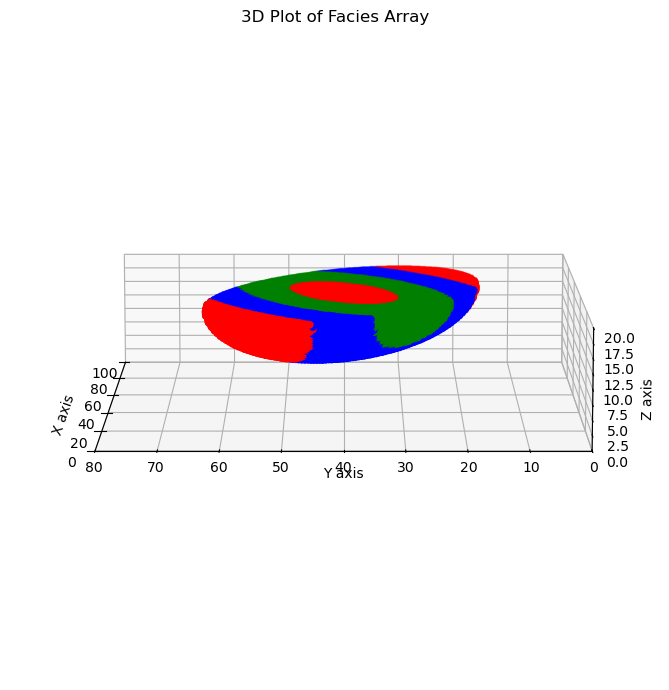

In [10]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plotting the facies array
# facies = facies.flatten()
colors = np.where(
    facies == 1, "r", np.where(facies == 2, "g", np.where(facies == 3, "b", "k"))
)
ax.scatter(
    x[facies != -1],
    y[facies != -1],
    z[facies != -1],
    c=colors[facies != -1],
    marker="o",
)
ax.view_init(elev=10, azim=180)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_title("3D Plot of Facies Array")
ax.set_xlim(0, 100)
ax.set_ylim(0, 80)
ax.set_zlim(0, 20)
ax.set_box_aspect([4, 4, 1])  # Aspect ratio is 2:2:1 to reduce vertical exaggeration
fig.tight_layout()